In [1]:
import rescomp as rc
import numpy as np
from matplotlib import pyplot as plt

In [2]:
N = 50
RES_PARAMS = {
              "uniform_weights": True,
              "ridge_alpha": 1e-6,
              "signal_dim": 3,
              "res_sz": 1500,
              "activ_f": np.tanh,
              "gamma": 5,
              "sigma": .14,
             }

def digraph_err(mean_degree, rho):
    rcomp = rc.ResComp(**RES_PARAMS, spect_rad=rho, mean_degree=mean_degree)
    n = RES_PARAMS["res_sz"]
    alpha = RES_PARAMS["ridge_alpha"]
    t, U = rc.orbit("lorenz", trim=True)
    r0 = np.random.rand(n)*2 - 1
    R = rcomp.internal_state_response(t, U, r0)
    Wout = U.T @ R @ np.linalg.inv(R.T @ R + alpha * np.eye(n))
    Uhat = (Wout@R.T).T
    inferr = np.max(np.abs(Uhat - U))
    l2err = np.mean(np.sum((Uhat - U)**2, axis=1)**.5)
    return inferr, l2err

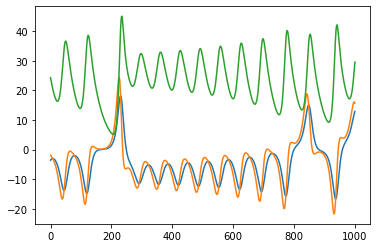

In [13]:
rho = 0.5
mean_degree = 0.001

rcomp = rc.ResComp(**RES_PARAMS, spect_rad=rho, mean_degree=mean_degree)
n = RES_PARAMS["res_sz"]
t, U = rc.orbit("lorenz", trim=True)
r0 = np.random.rand(n)*2 - 1
R = rcomp.internal_state_response(t, U, r0)
Wout = U.T @ R @ np.linalg.inv(R.T @ R + RES_PARAMS["ridge_alpha"]*np.eye(n))
Uhat = (Wout@R.T).T

plt.plot(Uhat)
plt.show()

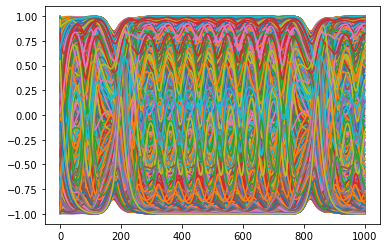

In [4]:
plt.plot(R)
plt.show()

# Dense

In [5]:
rho = .5
mean_degree = 2
inferr = []
l2err = []
for i in range(N):
    inf, l2 = digraph_err(mean_degree, rho)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

Error: 0.0011312385913264484 (Linf) 0.0003595298358440605 (L2)


In [6]:
rho = 25
mean_degree = 2
inferr = []
l2err = []
for i in range(N):
    inf, l2 = digraph_err(mean_degree, rho)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

Error: 0.003966352048823075 (Linf) 0.000917229550018234 (L2)


In [7]:
rho = 50
mean_degree = 2
inferr = []
l2err = []
for i in range(N):
    inf, l2 = digraph_err(mean_degree, rho)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

Error: 0.006842971336670741 (Linf) 0.0014232786298390033 (L2)


# Very Sparse

In [8]:
RES_PARAMS = {
              "uniform_weights": True,
              "ridge_alpha": 1e-6,
              "signal_dim": 3,
              "res_sz": 1500,
              "activ_f": np.tanh,
              "gamma": 5,
              "sigma": .14,
             }

In [9]:
rho = .5
mean_degree = 0.1
inferr = []
l2err = []
for i in range(N):
    inf, l2 = digraph_err(mean_degree, rho)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

Error: 0.003717557808718634 (Linf) 0.0009173172017155573 (L2)


In [10]:
rho = 10
mean_degree = 0.1
inferr = []
l2err = []
for i in range(N):
    inf, l2 = digraph_err(mean_degree, rho)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

Error: 0.006135837730579321 (Linf) 0.0014106939129247503 (L2)


In [11]:
rho = 25
mean_degree = 0.1
inferr = []
l2err = []
for i in range(N):
    inf, l2 = digraph_err(mean_degree, rho)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

Error: 0.011474349202938048 (Linf) 0.00207195458657228 (L2)


In [12]:
rho = 50
mean_degree = 0.1
inferr = []
l2err = []
for i in range(N):
    inf, l2 = digraph_err(mean_degree, rho)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

Error: 0.014089715437081804 (Linf) 0.002237363633032305 (L2)
